# Un poco de Machine Learning

Ahora vamos a ver como utilizar todo lo que hemos aprendido hasta ahora para hacer un programa de *Machine Learning*. Primero que nada, recordemos que este programa va a **aprender** de datos ya existentes para hacer **predicciones** sobre datos que no conoce. Pensemos en un ejemplo simple: una regresión lineal. Imaginemos que tenemos un *dataset* muy sencillo:

> Para ciertos timestamps de una partida de Age of Empires de Adrián, tenemos el número de aldeanos inactivos de su civilización.

Este dataset se puede graficar en un plano, en donde en el eje $X$ tenemos los minutos de juego y en el eje $Y$ el número de aldeanos inactivos. Cuando hacemos una regresión lineal, lo que deseamos es conocerla recta que pasa lo más cerca posible de un conjunto de puntos como se muestra en la imagen a continuación:

<img src="img/linear_regression.png" alt="Regresión Lineal" style="width: 30%;"/>

Ahora, ¿para qué nos sirve esto? Efectivamente, ahora podremos predecir para cierto *timestamp* que no conozcamos, el número de aldeanos inactivos de la civilazión de Adrián. La idea intrínseca es que nuestro programa **aprendió** de datos conocidos y ahora puede hacer **predicciones** de datos que no conoce. Lo que recibe como *input* es el tiempo de juego y lo que queremos predecir es el número de aldeanos inactivos.

En este caso queremos predecir un valor numérico en donde difícilmente nuestras predicciones nos van a dar el valor exacto, pero si un muy buen aproximado. Esta clase de tareas se llaman **Regresiones**.
Sin embargo, una de las tareas más famosas delegadas a los algoritmos de *Machine Learning* son las tareas de **Clasificación**. En estas tareas, los algoritmos al recibir un *input* predicen una clase para ese *input*. El ejemplo más clásico es entrenar un clasificador de *spam* para el correo. Este sería un clasificador binario, ya que si le mostramos un correo el programa puede dar dos opciones: **Sí, es spam** o **No, no es spam**. En este caso, las clases serían **spam** y **no spam**.
Sin embargo, un *input* puede caer en más de dos categorías. Un ejemplo clásico es clasificar dígitos escritos a mano. en este caso, al mostrarle un dígito el programa lo clasificará en alguna de las 10 clases, donde cada una corresponde a un dígito entre el 0 y el 9.

Ojo que en todos estos ejemplos el programa probablemente aprenderá con ejemplos en los que ya conoce la respuesta:

- Para la regresión lineal, para todos los timestamp vienen acompañados del número de aldeanos.
- Para el clasificador de *spam*, necesitaremos mostrarle al programa muchos correos, varios de ellos serán *spam* y varios no.
- Para el detector de dígitos, necesitamos mostrar muchos ejemplos de números escritos a mano y decirle al programa que número es.

Cuando el programa aprende de ejemplos donde ya conoce la respuesta, le llamamos aprendizaje **Supervisado**. Existe el aprendizaje No Supervisado, pero eso va mucho más allá del *scope* de cosas que queremos enseñar hoy. 

La idea de esta clase es usar la librería `scikit learn` de Python para entrenar y usar un modelo de *Machine Learning*. Así, al final de esta clase aprenderás a:

- Explorar datos que utilizarás para entrenar y probar un programa de *Machine Learning*.
- Entrenar un modelo utilizando `scikit learn`.
- Medir lo acertado que es tu modelo.
- Utilizar tu modelo para futuras predicciones.

Recuerda instalar `scikit-learn` utilizando `pip`:

```
pip install -U scikit-learn
```

## Los datos

Para esta actividad vamos a usar el *Iris flower dataset*, que habla sobre flores del género Iris. El *dataset* contiene 50 muestras de cada una de tres especies de Iris (Setosa, Virginica y Versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. Lo que haremos en esta actividad será **predecir el largo del sépalo de la especie Iris Setosa.**

Es el momento de explorar el *dataset*

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

El *dataset* contiene varias llaves, así que vamos a partir mostrando lo que contiene `data`:

In [2]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Notamos que este es un arreglo de ancho 4, que corresponden al ancho y largo de los sépalos y pétalos. Para saber cuál es cuál vamos a ver el nombre de las `features`:

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

Ahora comprendemos que la primera columna es el largo del sépalo, la segunda es el ancho del sépalo, la tercera es el largo del pétalo y la última el ancho del pétalo. También tenemos que filtrar el *dataset* para quedarnos solamente con las filas que corresponden a flores Iris Setosa:

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Aquí vemos que las primeras 50 columnas de nuestros datos corresponden a flores Iris Setosa. Con lo que ya aprendimos de numpy ahora vamos a filtrar los datos:

In [25]:
iris_setosa = iris['data'][iris['target'] == 0]
iris_setosa

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Ahora vamos a explorar visualmente los datos de la Iris Setosa. Recordemos que queremos predecir el largo del sépalo, que es la primera columna. Así que vamos a graficar el largo del pétalo en función de cada otra columna.

In [26]:
# A esta altura ya deberías haber instalado matplotlib
# Si no es así recuerda instalar la librería con pip

import matplotlib.pyplot as plt

# Filtramos la primera columna del dataset
setosa_sepal_length = iris_setosa[:, [True, False, False, False]]

# Filtramos para las otras columnas
setosa_sepal_width = iris_setosa[:, [False, True, False, False]]
setosa_petal_length = iris_setosa[:, [False, False, True, False]]
setosa_petal_width = iris_setosa[:, [False, False, False, True]]

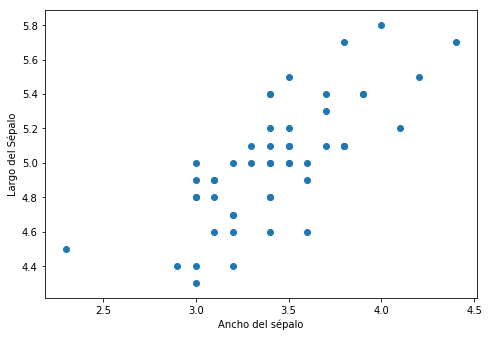

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(setosa_sepal_width, setosa_sepal_length)
ax.set_xlabel('Ancho del sépalo')
ax.set_ylabel('Largo del Sépalo')
plt.show()

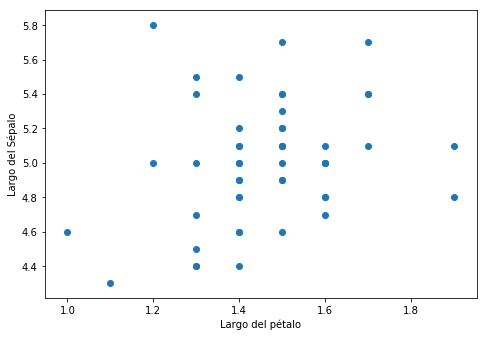

In [28]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(setosa_petal_length, setosa_sepal_length)
ax.set_xlabel('Largo del pétalo')
ax.set_ylabel('Largo del Sépalo')
plt.show()

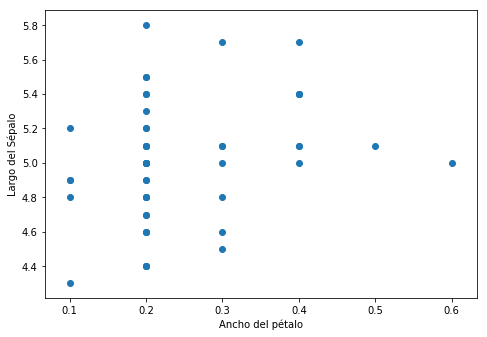

In [29]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(setosa_petal_width, setosa_sepal_length)
ax.set_xlabel('Ancho del pétalo')
ax.set_ylabel('Largo del Sépalo')
plt.show()

Visualmente podemos ver que el largo del sépalo parece estar relacionado al ancho del sépalo. Para explorar mejor esta idea vamos a buscar correlaciones. Haremos esto gracias a las funciones que nos provee `pandas`, pero tendremos que cargar los datos como un `DataFrame`.

In [30]:
import pandas as pd

df_setosa = pd.DataFrame(iris_setosa, columns=iris.feature_names)
df_setosa

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [32]:
corr_matrix = df_setosa.corr()
corr_matrix['sepal length (cm)'].sort_values(ascending=False)

sepal length (cm)    1.000000
sepal width (cm)     0.742547
petal width (cm)     0.278098
petal length (cm)    0.267176
Name: sepal length (cm), dtype: float64

Aquí encontramos un resultado muy interesante. La correlación entre el ancho y el largo del sépalo es bastante alta. Por lo tanto, vamos a hacer una regresión lineal que en el eje $X$ tiene el ancho del pétalo y en el eje $Y$ tiene el largo.

## Entrenando y probando nuestro modelo

Tenemos 50 registros que nos indican el ancho y largo del sépalo (la verdad no son tantos, pero para está actividad va a estar bien). Así que haremos algo muy común en el área de *Machine Learning*: vamos a separar nuestros datos en un set de entrenamiento y un set de prueba. 

La idea es escoger aleatoriamente un pequeño grupo de datos y lo vamos a separar. Este será nuestro set de prueba. Los otros datos, que sería el set de entrenamiento, lo vamos a utilizar para hacer la regresión lineal (es decir, encontrar la recta que que se ajusta mejor). Luego, para cada ancho de sépalo del set de prueba, vamos a "predecir" su largo con la regresión. Como conocemos la respuesta correcta, vamos a ir calculando el *mean squared error* para nuestro programa. Para esto vamos a usar una función de la librería `scikit-learn`

In [34]:
from sklearn.model_selection import train_test_split

# La primera columna es el largo del sépalo y la segunda el ancho del sépalo
setosa_sepal_data = iris_setosa[:, [True, True, False, False]]

train_set, test_set

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3]])